In [21]:
from jaxnn import dataset
from jaxnn.model import Model
from jaxnn import nn
from jaxnn import optimizers
from jaxnn import loss
import jax
from jax import numpy as jnp
from matplotlib import pyplot as plt
import torchvision
import torch

In [22]:
dataloader, cls_map = dataset.face_mask_dataloader(seed=1024, valid_ratio=.1)
(train_iter, (x, y)) = next(dataloader)

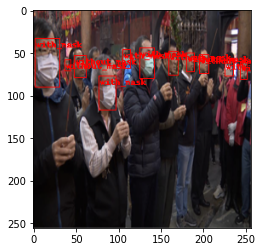

In [23]:
x1  = x[1]
y1 = y[1]

def draw_bbox(img, bbox):
    img = torch.from_numpy(img * 255).to(torch.uint8)
    bbox = torch.from_numpy(bbox)
    bbox = torch.clone(bbox)
    bbox[:, 1::2] = bbox[:, 1::2] * img.shape[1]
    bbox[:, 2::2] = bbox[:, 2::2] * img.shape[0]
    bbox = bbox.to(torch.int32)
    filter = []
    for i in range(bbox.shape[0]):
        if bbox[i, 0] >= 0:
            filter.append(bbox[i])
    bbox = torch.stack(filter)
    labels = [i for i in bbox[:, 0] if i >= 0]
    labels = cls_map[labels]
    img = img.permute((2,0,1))
    return torchvision.utils.draw_bounding_boxes(img, bbox[:, 1:], colors='red', labels=labels).permute((1,2,0))

draw = draw_bbox(x1, y1)
img = plt.imshow(draw)

In [24]:
x.shape

(85, 256, 256, 3)